In [4]:
import pandas as pd
from matplotlib import pyplot as plt

Read the files that contain the protected attributes/demographics

In [272]:
patients = pd.read_csv('data/PATIENTS.csv')
patients

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0


In [273]:
admissions = pd.read_csv('data/ADMISSIONS.csv')
admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


Keep only the necessary columns

In [274]:
# keep gender and age
patients = patients[['SUBJECT_ID', 'GENDER', 'DOB']]
# keep language, insurance, religion, marital status, ethnicity
admissions = admissions[['SUBJECT_ID', 'LANGUAGE', 'INSURANCE', 'RELIGION', 'ETHNICITY', 'ADMITTIME']]

In [275]:
demographics = patients.merge(admissions, how='left', on='SUBJECT_ID')
demographics

,SUBJECT_ID,GENDER,DOB,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,ADMITTIME
0,249,F,2075-03-13 00:00:00,NaN,Medicare,CATHOLIC,WHITE,2149-12-17 20:41:00
1,249,F,2075-03-13 00:00:00,ENGL,Medicare,CATHOLIC,WHITE,2155-02-03 20:16:00
2,249,F,2075-03-13 00:00:00,ENGL,Medicare,CATHOLIC,WHITE,2156-04-27 15:33:00
3,250,F,2164-12-27 00:00:00,HAIT,Self Pay,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,2188-11-12 09:22:00
4,251,M,2090-03-15 00:00:00,NaN,Private,OTHER,UNKNOWN/NOT SPECIFIED,2110-07-27 06:46:00
...,...,...,...,...,...,...,...,...
58971,44089,M,2026-05-25 00:00:00,ENGL,Medicare,GREEK ORTHODOX,WHITE,2111-09-30 12:04:00
58972,44115,F,2124-07-27 00:00:00,ENGL,Private,CATHOLIC,WHITE,2161-07-15 12:00:00
58973,44123,F,2049-11-26 00:00:00,NaN,Medicare,CATHOLIC,WHITE,2135-01-06 07:15:00
58974,44126,F,2076-07-25 00:00:00,ENGL,Private,NOT SPECIFIED,WHITE,2129-01-03 07:15:00


##### Gender preprocessing
The privileged class (1) is the majority class, which is the M(ale).

In [276]:
print("Number of Null values: ", demographics['GENDER'].isna().sum())
demographics['GENDER'].value_counts()

Number of Null values:  0


GENDER
M    32950
F    26026
Name: count, dtype: int64

In [277]:
demographics['GENDER'] = demographics['GENDER'].apply(lambda gender: 0 if gender == "F" else 1)
demographics

,SUBJECT_ID,GENDER,DOB,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,ADMITTIME
0,249,0,2075-03-13 00:00:00,NaN,Medicare,CATHOLIC,WHITE,2149-12-17 20:41:00
1,249,0,2075-03-13 00:00:00,ENGL,Medicare,CATHOLIC,WHITE,2155-02-03 20:16:00
2,249,0,2075-03-13 00:00:00,ENGL,Medicare,CATHOLIC,WHITE,2156-04-27 15:33:00
3,250,0,2164-12-27 00:00:00,HAIT,Self Pay,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,2188-11-12 09:22:00
4,251,1,2090-03-15 00:00:00,NaN,Private,OTHER,UNKNOWN/NOT SPECIFIED,2110-07-27 06:46:00
...,...,...,...,...,...,...,...,...
58971,44089,1,2026-05-25 00:00:00,ENGL,Medicare,GREEK ORTHODOX,WHITE,2111-09-30 12:04:00
58972,44115,0,2124-07-27 00:00:00,ENGL,Private,CATHOLIC,WHITE,2161-07-15 12:00:00
58973,44123,0,2049-11-26 00:00:00,NaN,Medicare,CATHOLIC,WHITE,2135-01-06 07:15:00
58974,44126,0,2076-07-25 00:00:00,ENGL,Private,NOT SPECIFIED,WHITE,2129-01-03 07:15:00


##### Age preprocessing
The privileged class (1) is the non-older adults (<=65).


In [278]:
# there is a defined rule to "de-anonymize" the age attribute
def age(demographics):
    demographics['ADMITTIME'] = pd.to_datetime(demographics['ADMITTIME']).dt.date
    demographics['DOB'] = pd.to_datetime(demographics['DOB']).dt.date
    demographics['AGE'] = demographics.apply(lambda row:int((row['ADMITTIME'] - row['DOB']).days/365.242), axis=1)
    demographics.loc[demographics['AGE'] <= 0, 'AGE'] = 90
    demographics.loc[demographics['AGE'] >= 300, 'AGE'] = 90
    return demographics

Number of Null values:  0


(array([  796.,  1646.,  1672.,  3306.,  4773.,  7344.,  8451.,  7180.,
         8492., 15316.]),
 array([14. , 21.6, 29.2, 36.8, 44.4, 52. , 59.6, 67.2, 74.8, 82.4, 90. ]),
 <BarContainer object of 10 artists>)

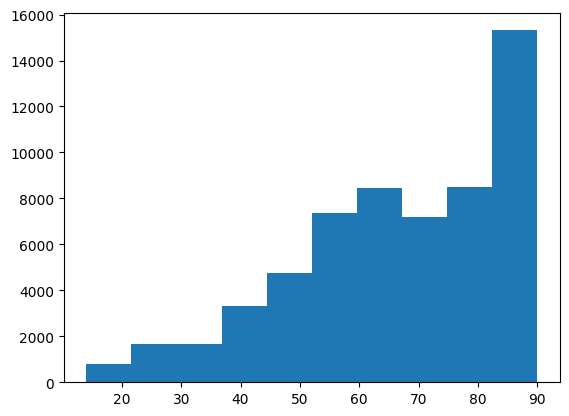

In [279]:
demographics = age(demographics)
print("Number of Null values: ", demographics['AGE'].isna().sum())
plt.hist(demographics['AGE'])

In [280]:
demographics['AGE'] = demographics['AGE'].apply(lambda age:1 if age<=65 else 0)
demographics.drop(columns=['DOB', 'ADMITTIME'], inplace=True)
demographics

,SUBJECT_ID,GENDER,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,AGE
0,249,0,NaN,Medicare,CATHOLIC,WHITE,0
1,249,0,ENGL,Medicare,CATHOLIC,WHITE,0
2,249,0,ENGL,Medicare,CATHOLIC,WHITE,0
3,250,0,HAIT,Self Pay,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,1
4,251,1,NaN,Private,OTHER,UNKNOWN/NOT SPECIFIED,1
...,...,...,...,...,...,...,...
58971,44089,1,ENGL,Medicare,GREEK ORTHODOX,WHITE,0
58972,44115,0,ENGL,Private,CATHOLIC,WHITE,1
58973,44123,0,NaN,Medicare,CATHOLIC,WHITE,0
58974,44126,0,ENGL,Private,NOT SPECIFIED,WHITE,1


##### Language preprocessing
The privileged class (1) is the English speakers.
Binarize the languages into English and non-english and the give null values the majority class.

In [281]:
print("Number of Null values: ", demographics['LANGUAGE'].isna().sum())
demographics['LANGUAGE'].value_counts()

Number of Null values:  25332


LANGUAGE
ENGL    29086
SPAN     1083
RUSS      790
PTUN      628
CANT      413
        ...  
*PUN        1
*ROM        1
*PHI        1
* FU        1
** T        1
Name: count, Length: 75, dtype: int64

In [282]:
# fill nans with the majority class
demographics['LANGUAGE'] = demographics['LANGUAGE'].fillna(demographics['LANGUAGE'].value_counts().keys()[0])
demographics['LANGUAGE'].value_counts()

LANGUAGE
ENGL    54418
SPAN     1083
RUSS      790
PTUN      628
CANT      413
        ...  
*PUN        1
*ROM        1
*PHI        1
* FU        1
** T        1
Name: count, Length: 75, dtype: int64

In [283]:
demographics['LANGUAGE'] = demographics['LANGUAGE'].apply(lambda language:1 if language=='ENGL' else 0)
demographics

,SUBJECT_ID,GENDER,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,AGE
0,249,0,1,Medicare,CATHOLIC,WHITE,0
1,249,0,1,Medicare,CATHOLIC,WHITE,0
2,249,0,1,Medicare,CATHOLIC,WHITE,0
3,250,0,0,Self Pay,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,1
4,251,1,1,Private,OTHER,UNKNOWN/NOT SPECIFIED,1
...,...,...,...,...,...,...,...
58971,44089,1,1,Medicare,GREEK ORTHODOX,WHITE,0
58972,44115,0,1,Private,CATHOLIC,WHITE,1
58973,44123,0,1,Medicare,CATHOLIC,WHITE,0
58974,44126,0,1,Private,NOT SPECIFIED,WHITE,1


##### Insurance preprocessing
The privileged class (1) is the patients with insurance (all types except Self Pay).
Binarize the insurance into Self-Pay and all the other insurance types.

In [284]:
print("Number of Null values: ", demographics['INSURANCE'].isna().sum())
demographics['INSURANCE'].value_counts()

Number of Null values:  0


INSURANCE
Medicare      28215
Private       22582
Medicaid       5785
Government     1783
Self Pay        611
Name: count, dtype: int64

In [285]:
demographics['INSURANCE'] = demographics['INSURANCE'].apply(lambda insurance:0 if insurance=='Self Pay' else 1)
demographics

,SUBJECT_ID,GENDER,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,AGE
0,249,0,1,1,CATHOLIC,WHITE,0
1,249,0,1,1,CATHOLIC,WHITE,0
2,249,0,1,1,CATHOLIC,WHITE,0
3,250,0,0,0,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,1
4,251,1,1,1,OTHER,UNKNOWN/NOT SPECIFIED,1
...,...,...,...,...,...,...,...
58971,44089,1,1,1,GREEK ORTHODOX,WHITE,0
58972,44115,0,1,1,CATHOLIC,WHITE,1
58973,44123,0,1,1,CATHOLIC,WHITE,0
58974,44126,0,1,1,NOT SPECIFIED,WHITE,1


##### Religion preprocessing
The privileged class (1) is the Cristians (all religions except Jewish, Other, Buddhist, Muslim, Hindu, Hebrew).
Binarize the insurance into Cristians and non-cristians and give the null values the majority class.

In [286]:
print("Number of Null values: ", demographics['RELIGION'].isna().sum())
demographics['RELIGION'].value_counts()

Number of Null values:  458


RELIGION
CATHOLIC                  20606
NOT SPECIFIED             11753
UNOBTAINABLE               8269
PROTESTANT QUAKER          7134
JEWISH                     5314
OTHER                      2696
EPISCOPALIAN                774
GREEK ORTHODOX              459
CHRISTIAN SCIENTIST         429
BUDDHIST                    267
MUSLIM                      225
JEHOVAH'S WITNESS           139
UNITARIAN-UNIVERSALIST      124
HINDU                       113
ROMANIAN EAST. ORTH          83
7TH DAY ADVENTIST            81
BAPTIST                      28
HEBREW                       16
METHODIST                     7
LUTHERAN                      1
Name: count, dtype: int64

In [287]:
# fill nans with the majority class
demographics['RELIGION'] = demographics['RELIGION'].fillna(demographics['RELIGION'].value_counts().keys()[0])
demographics['RELIGION'].value_counts()

RELIGION
CATHOLIC                  21064
NOT SPECIFIED             11753
UNOBTAINABLE               8269
PROTESTANT QUAKER          7134
JEWISH                     5314
OTHER                      2696
EPISCOPALIAN                774
GREEK ORTHODOX              459
CHRISTIAN SCIENTIST         429
BUDDHIST                    267
MUSLIM                      225
JEHOVAH'S WITNESS           139
UNITARIAN-UNIVERSALIST      124
HINDU                       113
ROMANIAN EAST. ORTH          83
7TH DAY ADVENTIST            81
BAPTIST                      28
HEBREW                       16
METHODIST                     7
LUTHERAN                      1
Name: count, dtype: int64

In [288]:
demographics['RELIGION'] = demographics['RELIGION'].apply(lambda religion:0 if religion == 'JEWISH' or religion == 'OTHER' or religion =='BUDDHIST' or religion == 'MUSLIM' or religion == 'HINDU' or religion == 'HEBREW' else 1)
demographics

,SUBJECT_ID,GENDER,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,AGE
0,249,0,1,1,1,WHITE,0
1,249,0,1,1,1,WHITE,0
2,249,0,1,1,1,WHITE,0
3,250,0,0,0,1,BLACK/AFRICAN AMERICAN,1
4,251,1,1,1,0,UNKNOWN/NOT SPECIFIED,1
...,...,...,...,...,...,...,...
58971,44089,1,1,1,1,WHITE,0
58972,44115,0,1,1,1,WHITE,1
58973,44123,0,1,1,1,WHITE,0
58974,44126,0,1,1,1,WHITE,1


##### Ethnicity preprocessing
The privileged class (1) is the WHITE patients (WHITE, WHITE - RUSSIAN, WHITE - OTHER EUROPEAN, WHITE - BRAZILIAN, WHITE - EASTERN EUROPEAN).
Binarize the ethnicity into WHITE and non-white.

In [289]:
print("Number of Null values: ", demographics['ETHNICITY'].isna().sum())
demographics['ETHNICITY'].value_counts()

Number of Null values:  0


ETHNICITY
WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85


In [290]:
demographics['ETHNICITY'] = demographics['ETHNICITY'].apply(lambda ethnicity:1 if ethnicity == 'WHITE' or ethnicity == 'WHITE - RUSSIAN' or ethnicity =='WHITE - OTHER EUROPEAN' or ethnicity == 'WHITE - BRAZILIAN' or ethnicity == 'WHITE - EASTERN EUROPEAN' else 0)
demographics

,SUBJECT_ID,GENDER,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,AGE
0,249,0,1,1,1,1,0
1,249,0,1,1,1,1,0
2,249,0,1,1,1,1,0
3,250,0,0,0,1,0,1
4,251,1,1,1,0,0,1
...,...,...,...,...,...,...,...
58971,44089,1,1,1,1,1,0
58972,44115,0,1,1,1,1,1
58973,44123,0,1,1,1,1,0
58974,44126,0,1,1,1,1,1


##### Remove the duplicates - keep the last record of demographics updates

In [291]:
demographics.drop_duplicates(subset=['SUBJECT_ID'], keep='last', inplace=True)
demographics.reset_index(drop=True, inplace=True)
demographics

,SUBJECT_ID,GENDER,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,AGE
0,249,0,1,1,1,1,0
1,250,0,0,0,1,0,1
2,251,1,1,1,0,0,1
3,252,1,1,1,1,1,1
4,253,0,1,1,1,1,0
...,...,...,...,...,...,...,...
46515,44089,1,1,1,1,1,0
46516,44115,0,1,1,1,1,1
46517,44123,0,1,1,1,1,0
46518,44126,0,1,1,1,1,1


In [292]:
demographics.to_csv('data/protected_attributes.csv', index=False)